**Assignment - 2**

**Ashutosh Jha**

**(11811)**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

**Dataset import**

In [ ]:
from google.colab import files

In [ ]:
csv_upload = files.upload()

Saving googleplaystore.csv to googleplaystore (1).csv


In [ ]:
dataset = pd.read_csv("googleplaystore.csv")

In [ ]:
dataset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
dataset.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
dataset.shape

(10841, 13)

In [ ]:
dataset.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
dataset.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

In [ ]:
dataset.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [ ]:
dataset.duplicated().sum()

483

Removing duplicated entries

In [ ]:
dataset.drop_duplicates(keep=False,inplace=True)

In [ ]:
dataset.duplicated().sum()

0

In [ ]:
dataset.describe()

,Rating
count,8491.000000
mean,4.186032
std,0.552493
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


Working on the missing values

In [ ]:
dataset['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  2.5,  1. ,  1.9,  2.9,  2.8,  2.3,  2.2,  1.7,  2. ,  1.8,
        2.7,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

dataset.Rating.value_counts()

In [ ]:
dataset[dataset['Rating']==19.0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


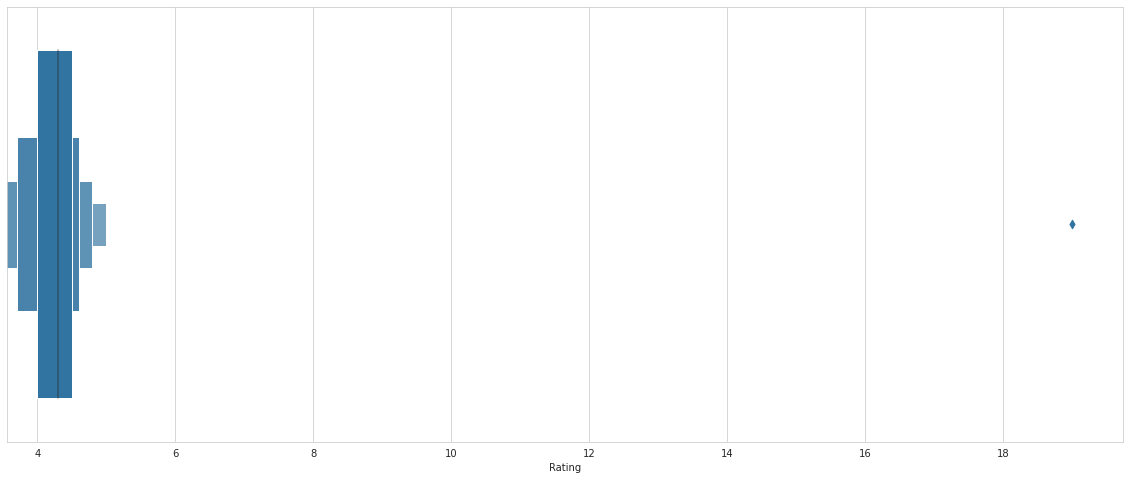

In [ ]:
plt.figure(figsize=(20, 8))
sns.boxenplot(x='Rating', data=dataset)

Outlier at 19 proved by the graph, converting that value to nan

In [ ]:
dataset.loc[dataset['Rating'] == 19.0, 'Rating'] = np.NaN

In [ ]:
dataset['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 2.5, 1. , 1.9,
       2.9, 2.8, 2.3, 2.2, 1.7, 2. , 1.8, 2.7, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [ ]:
dataset.isnull().sum()

App                  0
Category             0
Rating            1458
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
( dataset.isnull().sum() / dataset.count() ) * 100

App                0.000000
Category           0.000000
Rating            17.173145
Reviews            0.000000
Size               0.000000
Installs           0.000000
Type               0.010053
Price              0.000000
Content Rating     0.010053
Genres             0.000000
Last Updated       0.000000
Current Ver        0.080483
Android Ver        0.030166
dtype: float64

So, we have around 17% missing values in rating.

So, if we didnt remove the duplicated entries, this percentage comes around 15.68%.

Heat map to show missing values

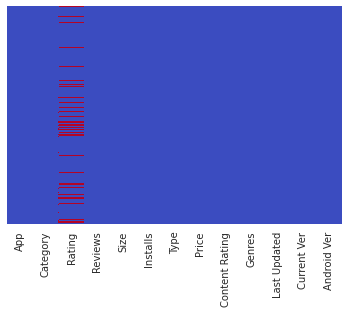

In [ ]:
sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False, cmap='coolwarm')

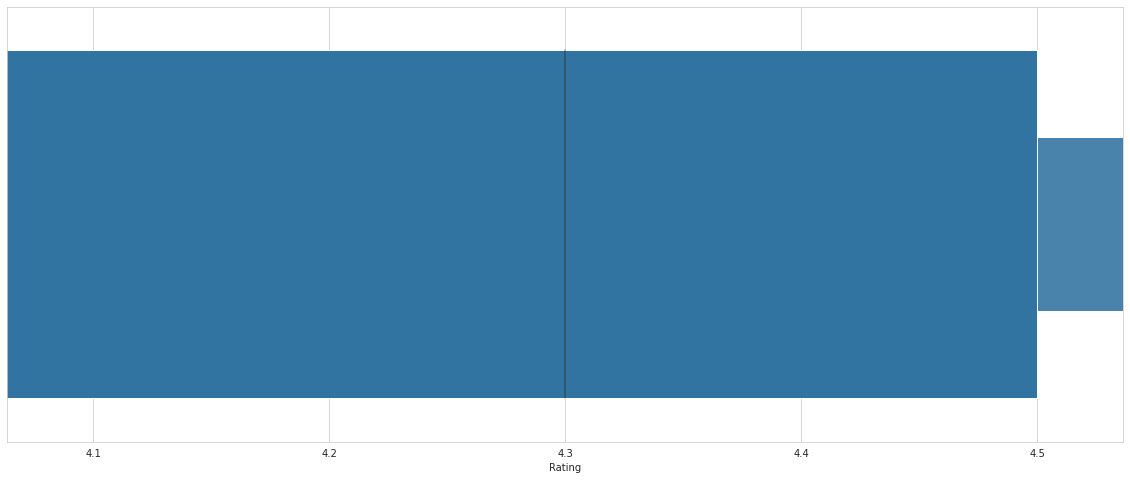

In [ ]:
plt.figure(figsize=(20, 8))
sns.boxenplot(x='Rating', data=dataset)

Rating    AxesSubplot(0.125,0.536818;0.065678x0.343182)
dtype: object

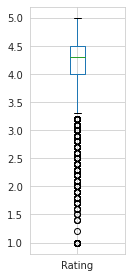

In [ ]:
dataset.plot(kind='box', subplots=True, layout=(2,10), sharex=False, sharey=False, figsize=(20,10))

Plotting the same graph setting the x-limits of the current axes

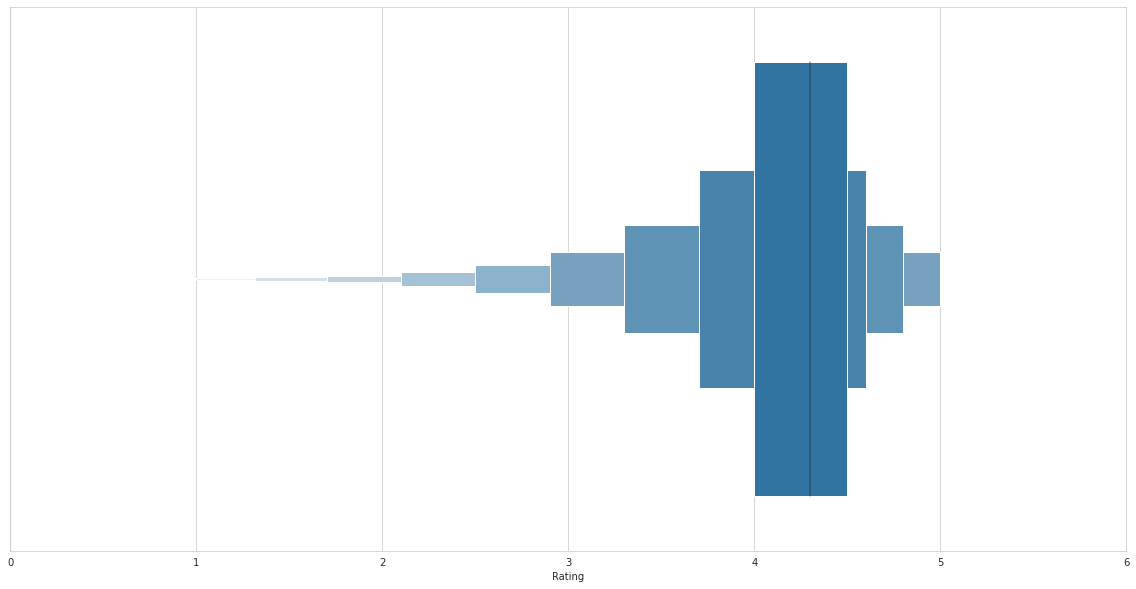

In [ ]:
plt.figure(figsize=(20,10))
plt.xlim(0,6)
sns.boxenplot(x='Rating', data=dataset);

So, we now have to convert the missing values

In [ ]:
dataset.groupby('Category').mean()


,Rating
Category,
1.9,NaN
ART_AND_DESIGN,4.358065
AUTO_AND_VEHICLES,4.190411
BEAUTY,4.278571
BOOKS_AND_REFERENCE,4.348864
BUSINESS,4.080913
COMICS,4.155172
COMMUNICATION,4.143206
DATING,3.967200


In [ ]:
dataset.Rating.mean()

4.184287396937578

In [ ]:
dataset['Rating'] = dataset['Rating'].fillna(dataset.Rating.mean())

In [ ]:
dataset.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

So, now as we can see there are some missing values in some of columns also

As our dataset is very big we will drop the rows contatining nan values.

In [ ]:
dataset['Current Ver'] = dataset['Current Ver'].astype(str)
dataset['Android Ver'] = dataset['Android Ver'].astype(str)
dataset['Type'] = dataset['Type'].astype(str)
dataset['Content Rating'] = dataset['Content Rating'].astype(str)
dataset['Category'] = dataset['Category'].astype(str)

In [ ]:
dataset.dropna()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.500000,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.184287,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.500000,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
dataset.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [ ]:
CategoryString = dataset["Category"]
categoryVal = dataset["Category"].unique()
categoryValCount = len(categoryVal)
category_dict = {}
for i in range(0,categoryValCount):
    category_dict[categoryVal[i]] = i
dataset["Category_c"] = dataset["Category"].map(category_dict).astype(int)

Oh yess, there is no missing data now. So, lets get to know our data with some graphs

Category Distribution

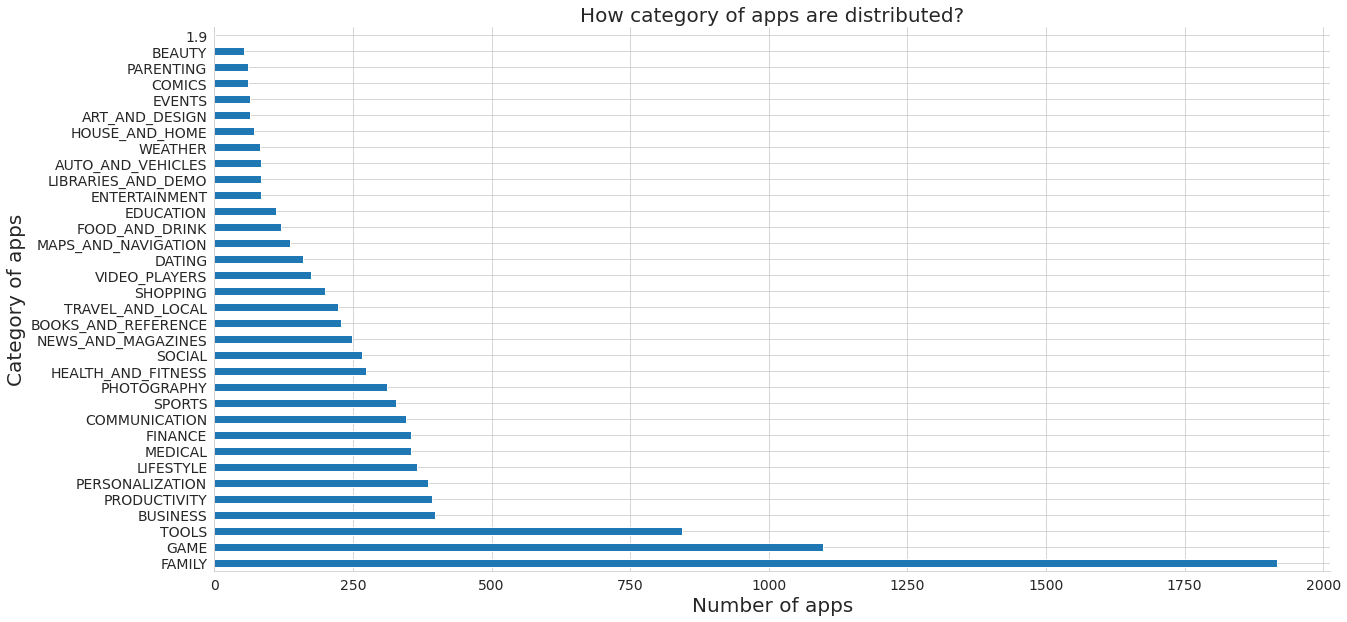

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel("Number of apps", fontsize=20)
plt.ylabel("Category of apps", fontsize=20)
plt.title("How category of apps are distributed?", fontsize=20)
ax = dataset['Category'].value_counts().plot(kind='barh', fontsize=14);
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)

Family category tops the chart with most no. of applications followed by the game and tools categories. Most categories dont have even 500 applications.

Genres Distribution

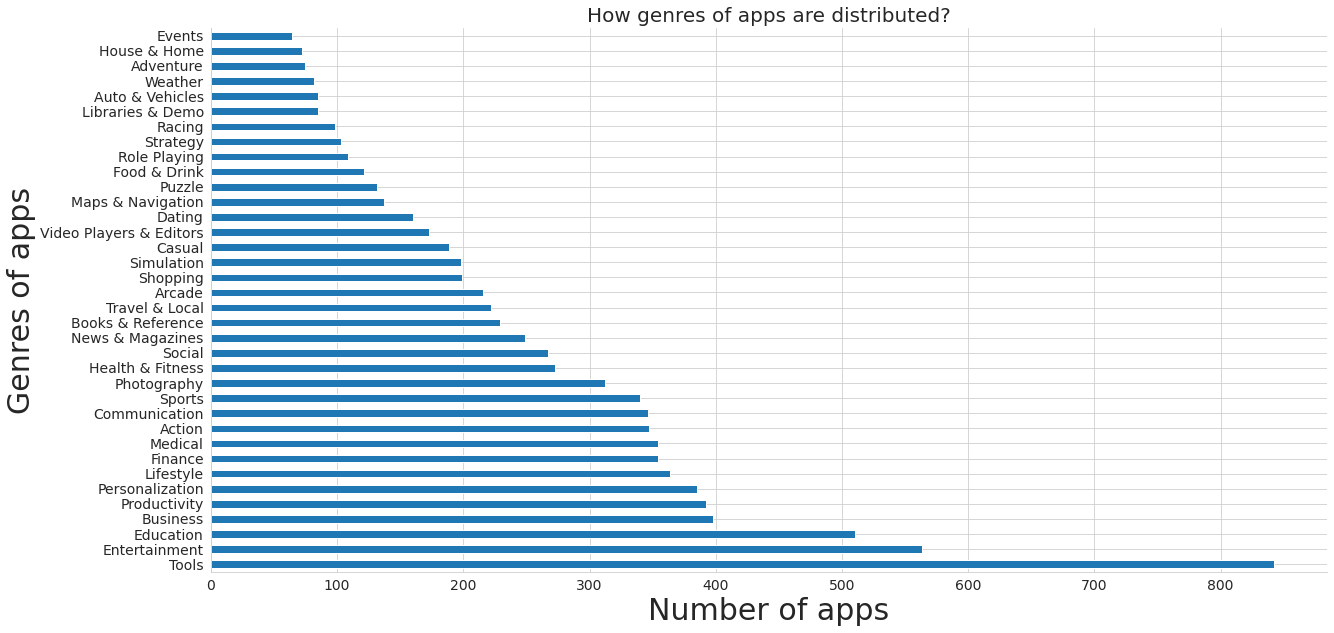

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel("Number of apps", fontsize=20)
plt.ylabel("Genres of apps", fontsize=20)
plt.title("How genres of apps are distributed?", fontsize=20)
temp = dataset.Genres.value_counts()
ax = temp[temp.values > 60].plot(kind='barh', fontsize=14);
ax.xaxis.label.set_size(30)
ax.yaxis.label.set_size(30)
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)

so, our dataset has more tools applications followed by entertainment and education

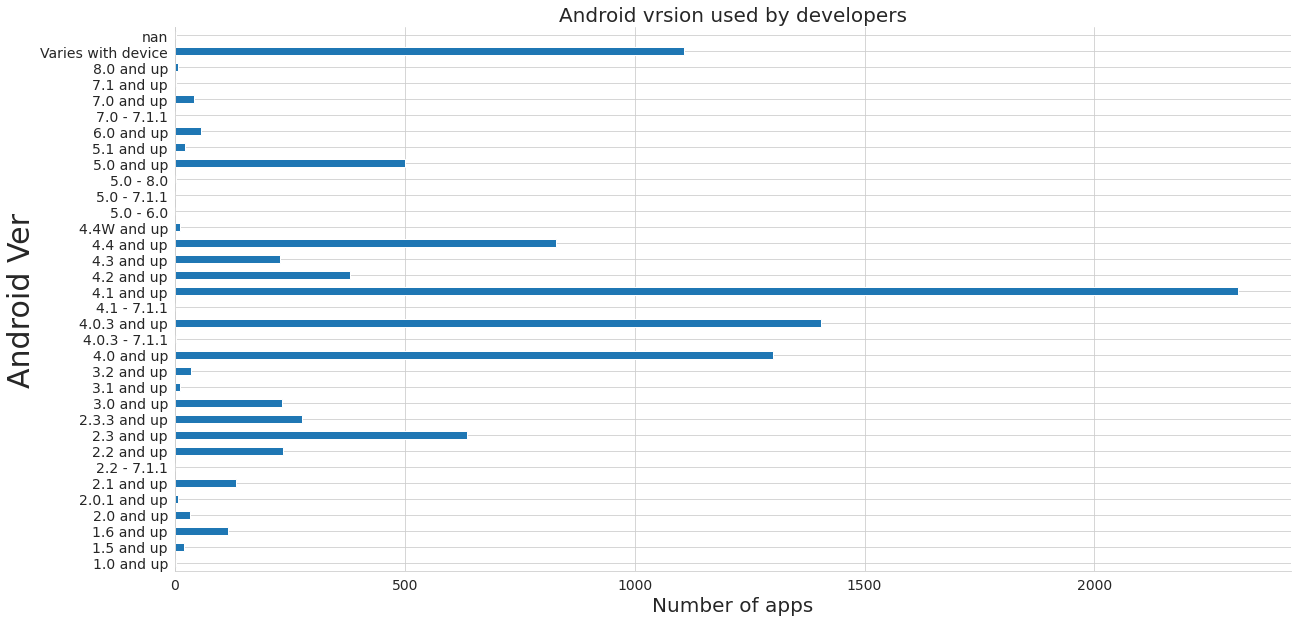

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel("Number of apps", fontsize=20)
plt.ylabel("Android Verison", fontsize=20)
plt.title("Android version used by developers", fontsize=20)
ax = dataset.groupby('Android Ver').count()['Installs'].plot(kind='barh', fontsize=14);
ax.yaxis.label.set_size(30)
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)

So, we will convert this data and plot again. We will cast the version to int

In [ ]:
dataset["Android Ver"].unique()


array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', 'nan', '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [ ]:
dataset["Android Ver"].str.split(' ')

0              [4.0.3, and, up]
1              [4.0.3, and, up]
2              [4.0.3, and, up]
3                [4.2, and, up]
4                [4.4, and, up]
                  ...          
10836            [4.1, and, up]
10837            [4.1, and, up]
10838            [2.2, and, up]
10839    [Varies, with, device]
10840    [Varies, with, device]
Name: Android Ver, Length: 9948, dtype: object

In [ ]:
def splitData(string):
  data = string.split(" ")
  return data[0]
dataset['Android Ver'] = dataset['Android Ver'].apply(splitData)

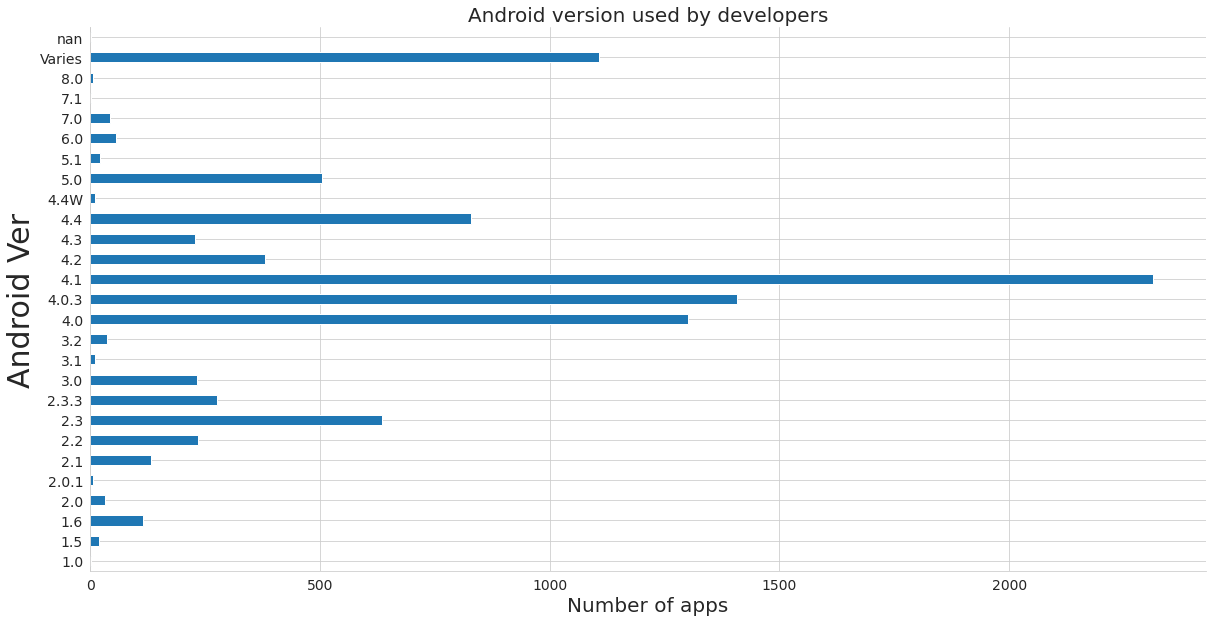

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel("Number of apps", fontsize=20)
plt.ylabel("Android Verison", fontsize=20)
plt.title("Android version used by developers", fontsize=20)
ax = dataset.groupby('Android Ver').count()['Installs'].plot(kind='barh', fontsize=14);
ax.yaxis.label.set_size(30)
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)

In [ ]:
dataset['Current Ver'] = dataset['Current Ver'].apply(splitData)

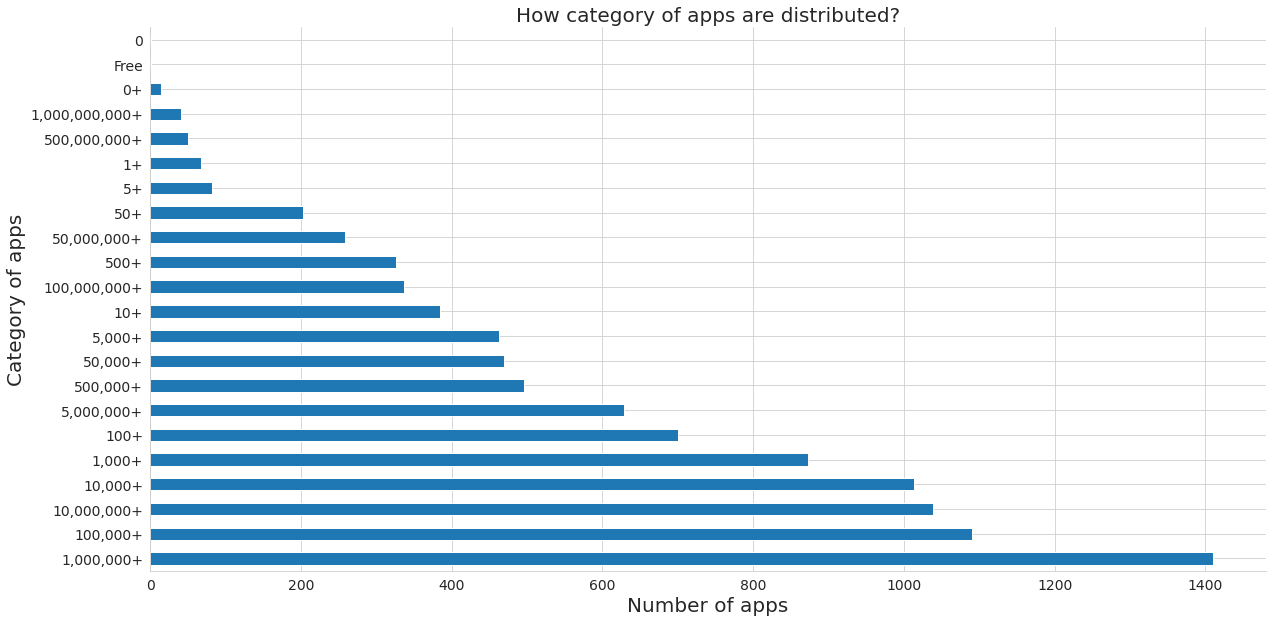

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel("Count", fontsize=20)
plt.ylabel("Installs", fontsize=20)
plt.title("Installs", fontsize=20)
ax = dataset['Installs'].value_counts().plot(kind='barh', fontsize=14);
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)

Install levels increases exponentially

Text(0.5, 1.0, 'Rating Histogram')

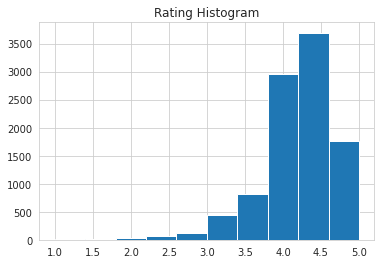

In [ ]:
dataset['Rating'].hist().plot(lind='bar')
plt.title('Rating Histogram')

Lets draw a median line to know more about data

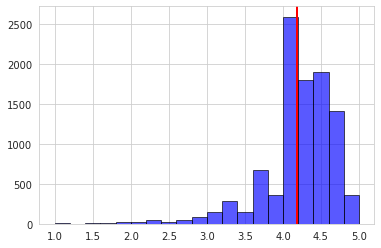

In [ ]:
x = dataset['Rating']
result = plt.hist(x, bins=20, color='blue', edgecolor='k', alpha=0.65)
plt.axvline(x.mean(), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(x.mean(), color='r', linestyle='solid', linewidth=2)

Ratings follow a Left skewed distribution
(red line is the median)

Text(0.5, 1.0, 'Type of Apps')

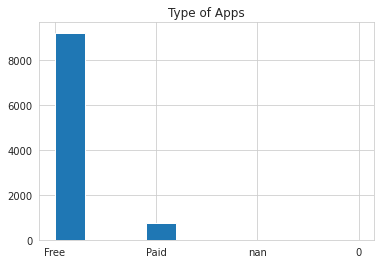

In [ ]:
dataset['Type'].hist().plot(lind='bar')
plt.title('Type of Apps')

So, most of the apps are free apps. But mind it, some apps also has in game purchases

In [ ]:
 ((dataset['Type'] == 'Free').sum() ) / (dataset['Type'].count())

0.9263168476075593

So, around 92.63% apps are free

(1.5, -0.5)

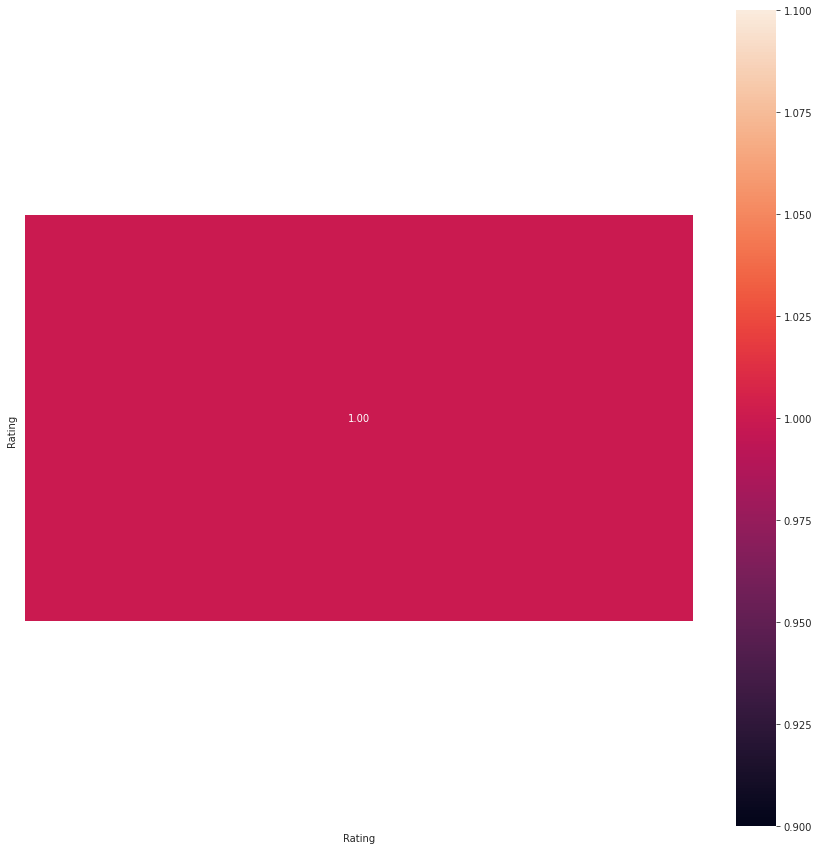

In [ ]:
corr_matrix = dataset.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)